## Homework 6: Digit detection with TensorFlow

## Nicolás Echeverri Rojas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.5.0'

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

## 0) Primer modelo

### 0.1) Carga de datos

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [9]:
X_train, X_test,y_train,y_test=train_test_split(featureMatrix,target,test_size=0.2)

In [16]:
X_train.shape

(60000, 28, 28)

### 0.2) Creación del modelo

In [31]:
tf.random.set_seed(1234)

model = Sequential([
                  Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
                  Dense(units=100,activation='relu',name='layer_1'),
                  Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                 ])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
myhistory=model.fit(X_train, y_train,  epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 8s - loss: 2.8784 - accuracy: 0.8395 - val_loss: 0.4380 - val_accuracy: 0.8943
Epoch 2/10
1688/1688 - 7s - loss: 0.4217 - accuracy: 0.8999 - val_loss: 0.3057 - val_accuracy: 0.9338
Epoch 3/10
1688/1688 - 6s - loss: 0.3183 - accuracy: 0.9189 - val_loss: 0.2599 - val_accuracy: 0.9408
Epoch 4/10
1688/1688 - 6s - loss: 0.2588 - accuracy: 0.9330 - val_loss: 0.2126 - val_accuracy: 0.9495
Epoch 5/10
1688/1688 - 6s - loss: 0.2378 - accuracy: 0.9391 - val_loss: 0.2160 - val_accuracy: 0.9507
Epoch 6/10
1688/1688 - 7s - loss: 0.2216 - accuracy: 0.9428 - val_loss: 0.1848 - val_accuracy: 0.9537
Epoch 7/10
1688/1688 - 7s - loss: 0.2021 - accuracy: 0.9475 - val_loss: 0.2437 - val_accuracy: 0.9445
Epoch 8/10
1688/1688 - 7s - loss: 0.2030 - accuracy: 0.9495 - val_loss: 0.2107 - val_accuracy: 0.9542
Epoch 9/10
1688/1688 - 7s - loss: 0.1983 - accuracy: 0.9509 - val_loss: 0.2125 - val_accuracy: 0.9487
Epoch 10/10
1688/1688 - 7s - loss: 0.1855 - accuracy: 0.9531 - val_loss: 0.2127 - 

### 0.3 Evaluación del modelo

In [35]:
model.evaluate( X_train,y_train)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.1706 - accuracy: 0.9554


[0.17062246799468994, 0.9554333090782166]

In [36]:
model.evaluate( X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.9420


[0.2821464240550995, 0.9419999718666077]

Se observa que el primer modelo alcanza una precisión bastante buena puesto que en los datos de train alcanza una precisión de 0.953, en los de validación 0.953 y en los de test de 0.942 sin embargo se va a intentar estos valores

## Aumentando el Performace del modelo de red neuronal

### 1) Normalización de los datos

Primero se realiza una normalización de los datos de tal manera que se evite vanish gradient o exploding gradient 


### 1.1) Normalización a Gaussiana estandar

In [37]:
from sklearn import preprocessing

In [48]:
X_train_reshaped=X_train.reshape(len(X_train),28*28)
X_test_reshaped=X_test.reshape(len(X_test),28*28)

In [49]:
X_train_normalized=preprocessing.StandardScaler().fit(X_train_reshaped).transform( X_train_reshaped)
X_test_normalized=preprocessing.StandardScaler().fit(X_test_reshaped).transform( X_test_reshaped)

In [54]:
tf.random.set_seed(1234)
model = Sequential([
                  InputLayer(input_shape=(28*28,)),
                  Dense(units=100,activation='relu',name='layer_1'),
                  Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                 ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_normalized, y_train,  epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 17s - loss: 0.2562 - accuracy: 0.9272 - val_loss: 0.1351 - val_accuracy: 0.9637
Epoch 2/10
1688/1688 - 7s - loss: 0.1087 - accuracy: 0.9687 - val_loss: 0.1241 - val_accuracy: 0.9685
Epoch 3/10
1688/1688 - 6s - loss: 0.0799 - accuracy: 0.9762 - val_loss: 0.1327 - val_accuracy: 0.9715
Epoch 4/10
1688/1688 - 7s - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.1270 - val_accuracy: 0.9715
Epoch 5/10
1688/1688 - 7s - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.1569 - val_accuracy: 0.9700
Epoch 6/10
1688/1688 - 7s - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.1552 - val_accuracy: 0.9740
Epoch 7/10
1688/1688 - 6s - loss: 0.0315 - accuracy: 0.9909 - val_loss: 0.1570 - val_accuracy: 0.9758
Epoch 8/10
1688/1688 - 7s - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.1757 - val_accuracy: 0.9748
Epoch 9/10
1688/1688 - 7s - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.1802 - val_accuracy: 0.9723
Epoch 10/10
1688/1688 - 7s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.2130 -

In [56]:
model.evaluate( X_test_normalized,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2165 - accuracy: 0.9670


[0.21650293469429016, 0.9670000076293945]

Al normalizar los datos las predicciones del modelo mejoran en gran medida pues alcanza una precisión del 0.993 en los datos de entranamiento, 0.968 en los datos de validación y 0.967 en los datos de test

### 1.2) Normalización por escalamiento

In [61]:
maxValue=np.max(X_train)

In [62]:
X_train_scaled, X_test_scaled=X_train/maxValue, X_test/maxValue

In [75]:
model = Sequential([
                  Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
                  Dense(units=100,activation='relu',name='layer_1'),
                  Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                 ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

myHistory=model.fit(X_train_scaled, y_train,  epochs=10, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/10
1688/1688 - 9s - loss: 0.2850 - accuracy: 0.9188 - val_loss: 0.1366 - val_accuracy: 0.9615
Epoch 2/10
1688/1688 - 7s - loss: 0.1340 - accuracy: 0.9597 - val_loss: 0.1113 - val_accuracy: 0.9705
Epoch 3/10
1688/1688 - 7s - loss: 0.0937 - accuracy: 0.9722 - val_loss: 0.0965 - val_accuracy: 0.9718
Epoch 4/10
1688/1688 - 7s - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0782 - val_accuracy: 0.9763
Epoch 5/10
1688/1688 - 6s - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 6/10
1688/1688 - 6s - loss: 0.0474 - accuracy: 0.9857 - val_loss: 0.0802 - val_accuracy: 0.9772
Epoch 7/10
1688/1688 - 6s - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0800 - val_accuracy: 0.9778
Epoch 8/10
1688/1688 - 6s - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 9/10
1688/1688 - 6s - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0925 - val_accuracy: 0.9738
Epoch 10/10
1688/1688 - 7s - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.0927 - 

In [77]:
myhistory.history['val_accuracy'][-1],myhistory.history['accuracy'][-1]

(0.9526666402816772, 0.9531111121177673)

In [80]:
myhistory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [72]:
model.evaluate( X_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9772


[0.08181190490722656, 0.9771999716758728]

Se obseva que este modelo posee una precisión de 0.9932 en datos de train,0.9772 en datos de validación y 0.9772 en datos de test, de tal manera que este escalamiento es el que mejor resultados ha arrojado

## 2) Variando hiperparámetros del modelo

In [100]:
def my_model(X_train, y_train,X_test, y_test, optimizerName,numberEpoch=10, plot=False,verbose=0):
        
        model = Sequential([
                  Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
                  Dense(units=100,activation='relu',name='layer_hidden'),
                  Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                 ])
        
        model.compile(optimizer=optimizerName,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
        
        myhistory=model.fit(X_train, y_train,  epochs=numberEpoch, batch_size=32, validation_split=0.1, verbose=verbose)
        
        TrainAccuracy=myhistory.history['accuracy'][-1]
        LossTrain=myhistory.history['loss'][-1]
        
        ValidationAccuracy=myhistory.history['val_accuracy'][-1]
        LossValidation=myhistory.history['val_loss'][-1]
        
        LossTest,AccuracyTest=model.evaluate( X_test,y_test)
        
        
        if plot is True:
            xvals=range(numberEpoch)
            fig,ax=plt.subplots(1,1)
            ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
            ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
            ax.set_xlabel('epochs')
            ax.set_ylabel('accuracy')
            ax.legend()
        
        return [ [LossTrain,TrainAccuracy],
                [LossValidation,ValidationAccuracy],
                [LossTest,AccuracyTest] ]
        


### 2.1) Probando optimizadores

### 2.1.1) adam

Epoch 1/10
1688/1688 - 8s - loss: 0.2899 - accuracy: 0.9188 - val_loss: 0.1313 - val_accuracy: 0.9622
Epoch 2/10
1688/1688 - 7s - loss: 0.1310 - accuracy: 0.9617 - val_loss: 0.1037 - val_accuracy: 0.9718
Epoch 3/10
1688/1688 - 7s - loss: 0.0919 - accuracy: 0.9722 - val_loss: 0.0916 - val_accuracy: 0.9737
Epoch 4/10
1688/1688 - 7s - loss: 0.0698 - accuracy: 0.9784 - val_loss: 0.0780 - val_accuracy: 0.9763
Epoch 5/10
1688/1688 - 7s - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0761 - val_accuracy: 0.9758
Epoch 6/10
1688/1688 - 8s - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 7/10
1688/1688 - 8s - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 8/10
1688/1688 - 8s - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 9/10
1688/1688 - 8s - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 10/10
1688/1688 - 7s - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0990 - 

[[0.019708558917045593, 0.9940000176429749],
 [0.09904004633426666, 0.9761666655540466],
 [0.09917376935482025, 0.9722999930381775]]

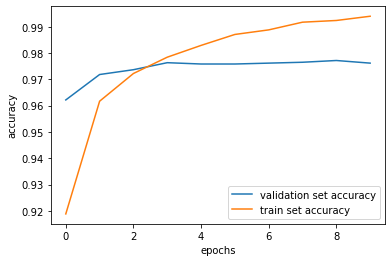

In [93]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='adam',plot=True,verbose=2)

### 2.1.2) SGD

313/313 [==============================] - 1s 4ms/step - loss: 0.1742 - accuracy: 0.9479


[[0.18180614709854126, 0.94862961769104],
 [0.15192881226539612, 0.9599999785423279],
 [0.1742238700389862, 0.9478999972343445]]

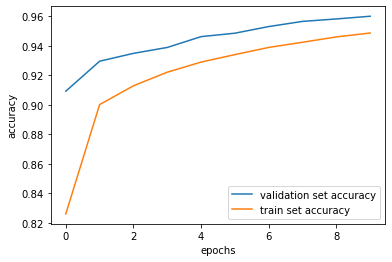

In [101]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='SGD',plot=True)


### 2.1.3) RMSprop

313/313 [==============================] - 1s 3ms/step - loss: 0.0962 - accuracy: 0.9763


[[0.03890860080718994, 0.9894999861717224],
 [0.11270833015441895, 0.9750000238418579],
 [0.09623933583498001, 0.9763000011444092]]

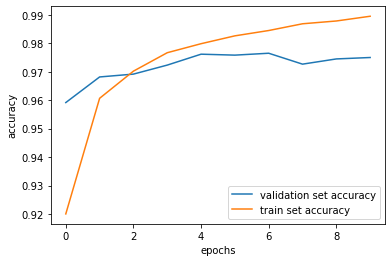

In [102]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',plot=True)


### 2.1.3) Adagrad

313/313 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.9070


[[0.3693792223930359, 0.8998703956604004],
 [0.3009898364543915, 0.9231666922569275],
 [0.34368792176246643, 0.9070000052452087]]

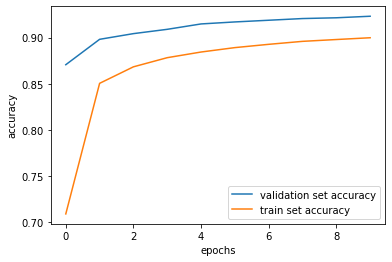

In [104]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='Adagrad',plot=True)

### 2.1.4) Adadelta

313/313 [==============================] - 1s 4ms/step - loss: 1.1838 - accuracy: 0.7836


[[1.2542403936386108, 0.7555925846099854],
 [1.168178677558899, 0.799833357334137],
 [1.1838144063949585, 0.7835999727249146]]

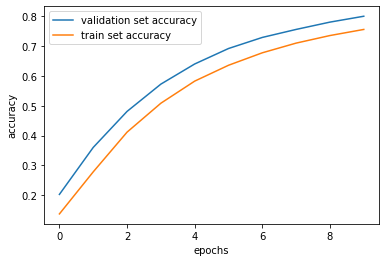

In [105]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='Adadelta',plot=True)

### 2.1.5) Adamax

313/313 [==============================] - 1s 3ms/step - loss: 0.0957 - accuracy: 0.9716


[[0.08140774816274643, 0.9773889183998108],
 [0.0886789932847023, 0.9751666784286499],
 [0.09573807567358017, 0.9715999960899353]]

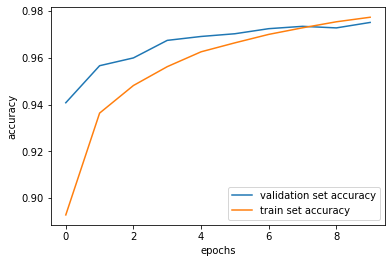

In [106]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='Adamax',plot=True)

Se observa que el mejor optimizador es RMSprop puesto que posee la mayor precisión en el conjunto de test pues alcanza a poseer 0.9763

En la siguiente tabla se resumen los resultados

| Optimizador | Train accuracy | Validation accuracy | Test accuracy |
| --- | --- | --- | --- |
| adam | 0.9940 | 0.9761 |  0.9722  |
| SGD | 0.9486 | 0.9599 |    0.9478 | 
| RMSprop | 0.9894 | 0.9750 |   0.9750 |
| Adagrad | 0.8998 | 0.9231 |  0.9070  |
| Adadelta | 0.7555 | 0.79983 |0.7835    |
| Adamax | 0.9773 | 0.97516 |   0.9715  |




### 2.2) Variando número de épocas del mejor optimizador

### 2.2.1) 20 épocas

313/313 [==============================] - 1s 3ms/step - loss: 0.1365 - accuracy: 0.9754


[[0.01450191717594862, 0.9964814782142639],
 [0.13187547028064728, 0.9798333048820496],
 [0.1364530324935913, 0.9753999710083008]]

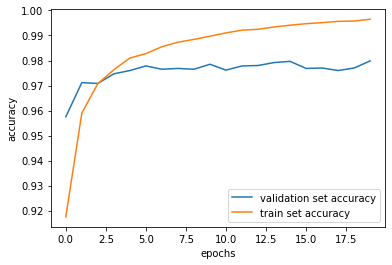

In [108]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=20,plot=True)

### 2.2.2) 25 épocas

313/313 [==============================] - 1s 4ms/step - loss: 0.1370 - accuracy: 0.9777


[[0.00951718632131815, 0.9977962970733643],
 [0.1703745573759079, 0.9773333072662354],
 [0.13698500394821167, 0.9776999950408936]]

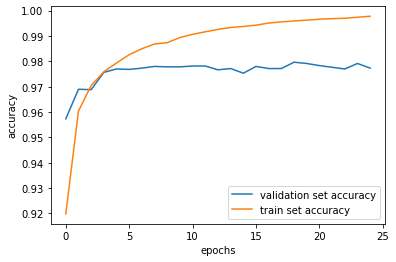

In [109]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=25,plot=True)

### 2.2.3) 40 épocas

313/313 [==============================] - 1s 3ms/step - loss: 0.2228 - accuracy: 0.9746


[[0.002722962526604533, 0.9993703961372375],
 [0.18938139081001282, 0.9801666736602783],
 [0.2227988839149475, 0.9746000170707703]]

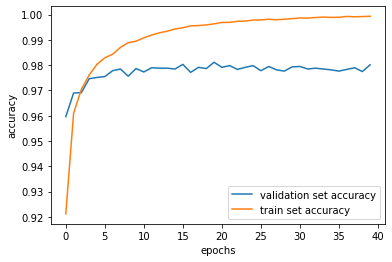

In [110]:
my_model(X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=40,plot=True)

Se observa que en alrededor de 8 épocas se empieza a estabilizar la precisión en el conjunto de validación por tanto se opta por entrenar el modelo en 12 épocas ya que no se observa un incremento sustancial en la precisión al incrementar más estas

### 2.3) Variando la arquitectura de la red

### 2.3.1) Variando número de neuronas

In [134]:
def my_model2(model,X_train, y_train,X_test, y_test, optimizerName,numberEpoch=10, plot=False,verbose=0, lossF='sparse_categorical_crossentropy'):
        tf.random.set_seed(1234)
        model.compile(optimizer=optimizerName,
              loss=lossF,
              metrics=['accuracy'])
        
        myhistory=model.fit(X_train, y_train,  epochs=numberEpoch, batch_size=32, validation_split=0.1, verbose=verbose)
        
        TrainAccuracy=myhistory.history['accuracy'][-1]
        LossTrain=myhistory.history['loss'][-1]
        
        ValidationAccuracy=myhistory.history['val_accuracy'][-1]
        LossValidation=myhistory.history['val_loss'][-1]
        
        LossTest,AccuracyTest=model.evaluate( X_test,y_test)
        
        
        if plot is True:
            xvals=range(numberEpoch)
            fig,ax=plt.subplots(1,1)
            ax.plot(xvals, myhistory.history['val_accuracy'],label='validation set accuracy')
            ax.plot(xvals, myhistory.history['accuracy'],label='train set accuracy')
            ax.set_xlabel('epochs')
            ax.set_ylabel('accuracy')
            ax.legend()
        
        return [ [LossTrain,TrainAccuracy],
                [LossValidation,ValidationAccuracy],
                [LossTest,AccuracyTest] ]

### 2.3.1.1)  50 neuronas

313/313 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9709


[[0.058653369545936584, 0.9839074015617371],
 [0.11484599858522415, 0.9743333458900452],
 [0.1118583008646965, 0.9708999991416931]]

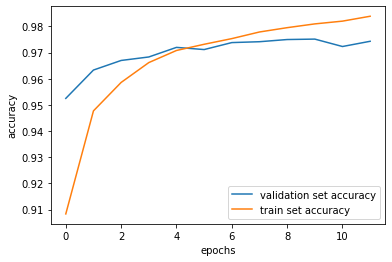

In [113]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=50,activation='relu',name='layer_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.1.2)   150 neuronas

313/313 [==============================] - 3s 5ms/step - loss: 0.1032 - accuracy: 0.9784


[[0.021654298529028893, 0.994351863861084],
 [0.11111532896757126, 0.9778333306312561],
 [0.10322557389736176, 0.9783999919891357]]

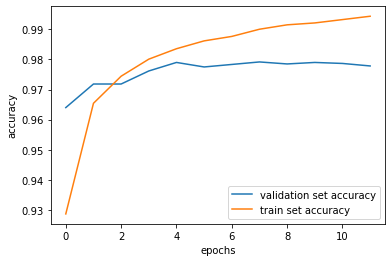

In [114]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=150,activation='relu',name='layer_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.1.3)   200 neuronas

313/313 [==============================] - 2s 5ms/step - loss: 0.0979 - accuracy: 0.9794


[[0.01772189512848854, 0.9951296448707581],
 [0.09511276334524155, 0.9819999933242798],
 [0.09794184565544128, 0.9793999791145325]]

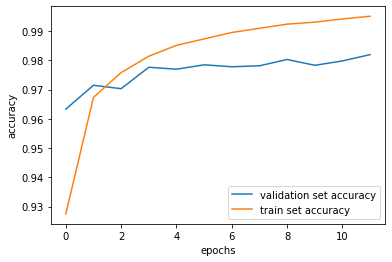

In [115]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=200,activation='relu',name='layer_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

Se observa que al aumentar el número de neuronas también aumenta la precisión puesto que usando 200 neuronas se alcanza una precisión de 0.979 en los datos de test, sin embargo el tiempo de cómputo ha empezado a ser considerable

En la siguiente tabla se resumen los resultados

| número neuronas | Train accuracy | Validation accuracy | Test accuracy |
| --- | --- | --- | --- |
| 50 | 0.9839 | 0.9743 |   0.9708  |
| 100 | 0.9894 | 0.9750 |   0.9750 |
| 150 | 0.9943 |  0.9778 |    0.9783 | 
| 200 | 0.9951 | 0.9819 |  0.9793  |

### 2.3.2) Variando número de capas y número de neuronas

### 2.3.2.1) modelo 1: 50-50

313/313 [==============================] - 1s 3ms/step - loss: 0.1309 - accuracy: 0.9732


[[0.044194694608449936, 0.9879444241523743],
 [0.12069746106863022, 0.9773333072662354],
 [0.13091862201690674, 0.9732000231742859]]

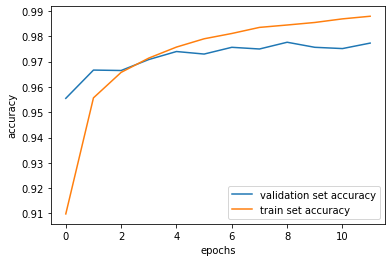

In [124]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=50,activation='relu',name='layer1_hidden'),
        Dense(units=50,activation='relu',name='layer2_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.2.2) modelo 2: 100-50

313/313 [==============================] - 1s 4ms/step - loss: 0.1274 - accuracy: 0.9776


[[0.025362692773342133, 0.9927592873573303],
 [0.12571920454502106, 0.9796666502952576],
 [0.12742142379283905, 0.9775999784469604]]

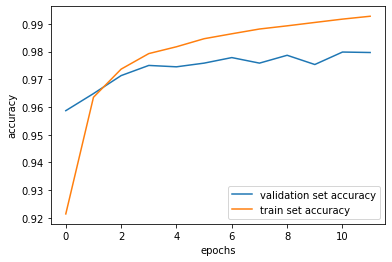

In [117]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=100,activation='relu',name='layer1_hidden'),
        Dense(units=50,activation='relu',name='layer2_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

Se observa que el modelo de dos capas, la primera de 100 y la segunda de 50 da un resultado de 0.9775, en comparación con el modelo de una capa de 150 neuronas con un resultado de  0.9783, de tal manera que este segundo modelo aunque tienen el mismo número de neuronas, posee mayor precisión

### 2.3.2.3) modelo 3: 100-50-25

313/313 [==============================] - 1s 4ms/step - loss: 0.1436 - accuracy: 0.9754


[[0.03171645104885101, 0.9912037253379822],
 [0.14456167817115784, 0.9791666865348816],
 [0.14361882209777832, 0.9753999710083008]]

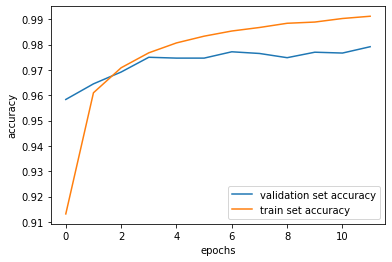

In [119]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=100,activation='relu',name='layer1_hidden'),
        Dense(units=50,activation='relu',name='layer2_hidden'),
        Dense(units=25,activation='relu',name='layer3_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.2.4) modelo 4: 100-100

313/313 [==============================] - 1s 4ms/step - loss: 0.1235 - accuracy: 0.9783


[[0.023202896118164062, 0.9935185313224792],
 [0.14480450749397278, 0.9798333048820496],
 [0.1234947144985199, 0.9782999753952026]]

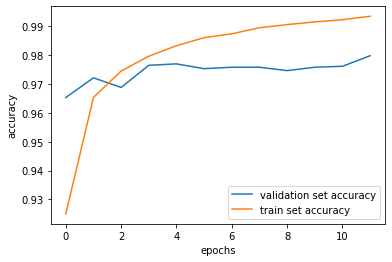

In [123]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=100,activation='relu',name='layer1_hidden'),
        Dense(units=100,activation='relu',name='layer2_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

el modelo de dos capas de cada uno de de 100 neuronas posee una precisión de 0.9782 en comparación con el modelo de 200 neuronas en una sola capa que da como resultado 0.9793, de tal manera que este segundo modelo posee una mayor precisión

### 2.3.2.5) modelo 5: 200-150

313/313 [==============================] - 1s 4ms/step - loss: 0.1518 - accuracy: 0.9790


[[0.017723558470606804, 0.9950185418128967],
 [0.1558871865272522, 0.9801666736602783],
 [0.15179023146629333, 0.9789999723434448]]

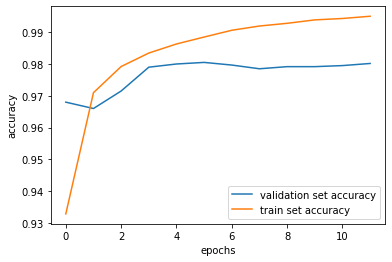

In [125]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=200,activation='relu',name='layer1_hidden'),
        Dense(units=150,activation='relu',name='layer2_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.2.6) modelo 6: 200-200

313/313 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9768


[[0.021439453586935997, 0.9946110844612122],
 [0.1753488928079605, 0.9785000085830688],
 [0.18812741339206696, 0.9768000245094299]]

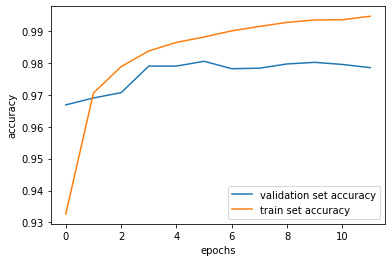

In [126]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=200,activation='relu',name='layer1_hidden'),
        Dense(units=200,activation='relu',name='layer2_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

### 2.3.2.7) modelo 7: 200-150-50

313/313 [==============================] - 2s 5ms/step - loss: 0.1797 - accuracy: 0.9781


[[0.032041747123003006, 0.9926666617393494],
 [0.19302178919315338, 0.9801666736602783],
 [0.1796800047159195, 0.9781000018119812]]

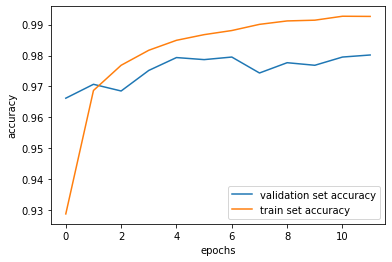

In [127]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=200,activation='relu',name='layer1_hidden'),
        Dense(units=150,activation='relu',name='layer2_hidden'),
        Dense(units=50,activation='relu',name='layer3_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train,X_test_scaled, y_test, optimizerName='RMSprop',numberEpoch=12,plot=True)

Se observa que aunque se haya incrementado el número de capas y de neuronas, el desemepeño de este sigue siendo menor al del una capa cocon 200 neuronas pues este alcanzó 0.979 en precisión en los datos de test, por tanto, se sigue usando este modelo para las siguientes variaciones de hiperparámetros

En la siguiente tabla se resumen los resultados

| Arquitectura | Train accuracy | Validation accuracy | Test accuracy |
| --- | --- | --- | --- |
| Arquitectura 0: 200 | 0.9951 | 0.9819 |  0.9793  |
| Arquitectura 1: 50-50 | 0.9879 | 0.9773 |   0.9732 |
| Arquitectura 2:100-50 | 0.9927 | 0.9796 |   0.9775 |
| Arquitectura 3: 100-50-25| 0.9912 |  0.9791 |  0.9753 | 
| Arquitectura 4: 100-100| 0.9935 | 0.97983 |  0.9782 |
| Arquitectura 5: 200-150| 0.9950 | 0.9801 |  0.9789  |
| Arquitectura 6: 200-200| 0.9946 | 0.9785 |  0.9768  |
| Arquitectura 7: 200-150-50| 0.9951 | 0.9819 |  0.9781  |

## 2.4) Usando one-hot encoding para la clasificación

In [128]:
from keras.utils.np_utils import to_categorical   
y_train_tf_one_hot = to_categorical(y_train, num_classes=10)
y_test_tf_one_hot = to_categorical(y_test, num_classes=10)

313/313 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9798


[[0.01693461835384369, 0.9952592849731445],
 [0.10663710534572601, 0.9816666841506958],
 [0.09980130940675735, 0.9797999858856201]]

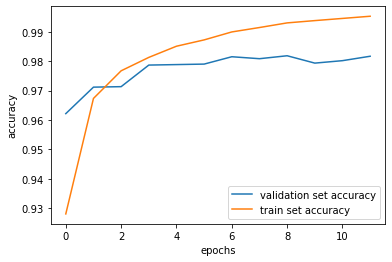

In [135]:
model = Sequential([
        Flatten(input_shape=(28,28)), #Para aplanar el arreglo de 28x28
        Dense(units=200,activation='relu',name='layer1_hidden'),
        Dense(units=10,activation='softmax',name='output_layer') #10 neuronas porque se tiene 10 categorias
                ])
my_model2(model,X_train_scaled, y_train_tf_one_hot ,X_test_scaled, y_test_tf_one_hot, 
          optimizerName='RMSprop',numberEpoch=12,lossF='categorical_crossentropy',plot=True)

Se observa que al utilizar codificación one-hot encoding se aumenta un poco la precisión (0.04%) en los datos de test

| modelo | Train accuracy | Validation accuracy | Test accuracy |
| --- | --- | --- | --- |
| Sin one-hot | 0.9951 | 0.9819 |  0.9793  |
| con one-hot | 0.9952 | 0.9816 |  0.9797 |

## 3) Conclusiones

Luego de explorar el espacio de los hiperparámetros para realizar la clasificación de dígitos se encontró que el mejor modelo prediciendo los datos posee las características:

- Escalamiento de datos: Escalamiento usando valor máximo de los datos

- Codificación: one-hot-encoding

- optimizador: RMSprop

- arquitectura: MLP, 1 hidden layer de 200 neuronas

- número épocas: 12

Dando como resultado:


| Model | Train accuracy | Validation accuracy | Test accuracy |
| --- | --- | --- | --- |
| First model | 0.9554 |  0.9527 |  0.9419  |
| Best model | 0.9952 | 0.9816 |  0.9797 |
|      Improvement      |    4%    |   3%     |     4%    |

De tal manera que se mejoró el modelo un 4% realizando la variación de los hiperparámetros.

En ningún modelo de los presentado se presentó underfitting o overfitting puesto que el error en los datos de validación jamás empezó a incrementar.
